In [89]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
import os

In [ ]:
from ultralytics import SAM

sam_model_small = SAM("models/sam2.1_s.pt")
sam_model_base = SAM("models/sam2.1_b.pt")
sam_model_large = SAM("models/sam2.1_l.pt")

sam_model_small.info()
sam_model_base.info()
sam_model_large.info()

# yolo_model_small = YOLO("models/yolo11s.pt")
# yolo_model_base = YOLO("models/yolo11m.pt")
# yolo_model_large = YOLO("models/yolo11l.pt")

# yolo_model_small.info()
# yolo_model_base.info()
# yolo_model_large.info()

model = sam_model_base

YOLO11s summary: 181 layers, 9,458,752 parameters, 0 gradients, 21.7 GFLOPs
YOLO11m summary: 231 layers, 20,114,688 parameters, 0 gradients, 68.5 GFLOPs
YOLO11l summary: 357 layers, 25,372,160 parameters, 0 gradients, 87.6 GFLOPs
Model summary: 339 layers, 46,060,354 parameters, 46,060,354 gradients
Model summary: 403 layers, 80,850,178 parameters, 80,850,178 gradients
Model summary: 595 layers, 224,446,642 parameters, 224,446,642 gradients


In [91]:
uuid = '6ca277d8-4005-4228-83d3-e425768b0eb3'

In [92]:
def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

In [93]:
# points = np.array([[650, 800]], dtype=np.float32)
# labels = np.array([1], np.int32)
# points = np.array([[650, 800], [650, 700]], dtype=np.float32)
# labels = np.array([1, 1], np.int32)
points = np.array([[[650, 800], [650, 750], [650, 700]]], dtype=np.float32)
labels = np.array([[1, 1, 1]], np.int32)


image 1/1 /home/yeong/Source/Projects/FYP/Miscellaneous/playground-ultralytics/6ca277d8-4005-4228-83d3-e425768b0eb3/frames/000105.jpg: 1024x1024 1 0, 85641.2ms
Speed: 3.9ms preprocess, 85641.2ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)


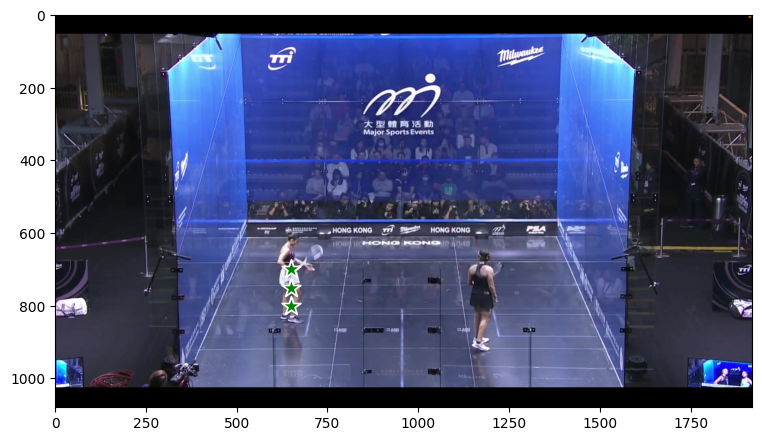

In [94]:
plt.figure(figsize=(9, 6))
image_path = os.path.join(uuid, "frames", "000105.jpg")
plt.imshow(Image.open(image_path))
show_points(points, labels, plt.gca())

results = model.predict(image_path, points=points, labels=labels, device="cuda")

In [95]:
print(results[0].masks.data.shape)

torch.Size([1, 1080, 1920])


In [96]:
# Assuming results[0].masks.data.cpu() is a list of tensors
tensors = results[0].masks.data.cpu()

# Check if all tensors have the same shape
if all(tensor.shape == tensors[0].shape for tensor in tensors):
    reference_tensor = tensors[0]
    differences = sum(not torch.equal(reference_tensor, tensor) for tensor in tensors[1:])
    print(f"Number of tensors different from the first tensor: {differences}")
else:
    print("Tensors have different shapes, comparison skipped.")

Number of tensors different from the first tensor: 0


In [97]:
print(results[0].boxes)
# ultralytics.engine.results.Boxes object with attributes:

# cls: tensor([0.], device='cuda:0')
# conf: tensor([0.9101], device='cuda:0')
# data: tensor([[611.0000, 602.0000, 712.0000, 852.0000,   0.9101,   0.0000]], device='cuda:0')
# id: None
# is_track: False
# orig_shape: (1080, 1920)
# shape: torch.Size([1, 6])
# xywh: tensor([[661.5000, 727.0000, 101.0000, 250.0000]], device='cuda:0')
# xywhn: tensor([[0.3445, 0.6731, 0.0526, 0.2315]], device='cuda:0')
# xyxy: tensor([[611., 602., 712., 852.]], device='cuda:0')
# xyxyn: tensor([[0.3182, 0.5574, 0.3708, 0.7889]], device='cuda:0')

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.9101], device='cuda:0')
data: tensor([[611.0000, 602.0000, 712.0000, 852.0000,   0.9101,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 1920)
shape: torch.Size([1, 6])
xywh: tensor([[661.5000, 727.0000, 101.0000, 250.0000]], device='cuda:0')
xywhn: tensor([[0.3445, 0.6731, 0.0526, 0.2315]], device='cuda:0')
xyxy: tensor([[611., 602., 712., 852.]], device='cuda:0')
xyxyn: tensor([[0.3182, 0.5574, 0.3708, 0.7889]], device='cuda:0')


In [98]:
print(results[0].boxes.xywh.cpu().numpy()[0]) # print(results[0].boxes.xywh.cpu().numpy()[0])

[      661.5         727         101         250]


/tmp/ipykernel_7123/1214632471.py:9: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)


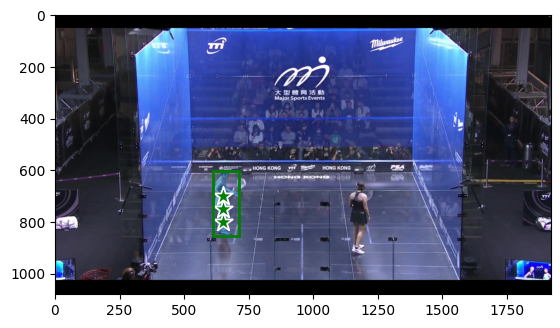

In [99]:
plt.imshow(Image.open(image_path))
show_points(points, labels, plt.gca())
show_mask(results[0].masks.data.cpu(), plt.gca())
show_box(results[0].boxes.xyxy.cpu().numpy()[0], plt.gca())